In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [5]:
df = pd.read_csv('flights_final.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97682 entries, 0 to 97681
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   op_unique_carrier    97682 non-null  int64  
 1   origin               97682 non-null  int64  
 2   dest                 97682 non-null  int64  
 3   dep_delay            97682 non-null  float64
 4   arr_delay            97682 non-null  float64
 5   crs_elapsed_time     97682 non-null  int64  
 6   actual_elapsed_time  97682 non-null  float64
 7   air_time             97682 non-null  float64
 8   distance             97682 non-null  int64  
 9   flight_status        97682 non-null  int64  
 10  month                97682 non-null  int64  
 11  weekday              97682 non-null  int64  
 12  dep_hour             97682 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 9.7 MB


In [6]:
X = df.drop(['flight_status','arr_delay','dep_delay'],axis=1)
y = df['flight_status']

In [7]:
# Standard Scaler creation using the fit_transform() method
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [8]:
X_test, X_train, y_test, y_train = train_test_split(scaled_df, y, test_size=0.30, random_state=42)

In [9]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [10]:
y_pred = clf.predict(X_test)

In [11]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
confusion_matrix(y_test,y_pred)

array([[38780,  4496],
       [21315,  3786]])

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.90      0.75     43276
           1       0.46      0.15      0.23     25101

    accuracy                           0.62     68377
   macro avg       0.55      0.52      0.49     68377
weighted avg       0.58      0.62      0.56     68377



In [14]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: -0.62


In [15]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %.4f" % (rmse))

RMSE: 0.6144


In [18]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

### ROC curve 

In [16]:
y_score1 = clf.predict_proba(X_test)[:,1]
y_score2 = clf.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

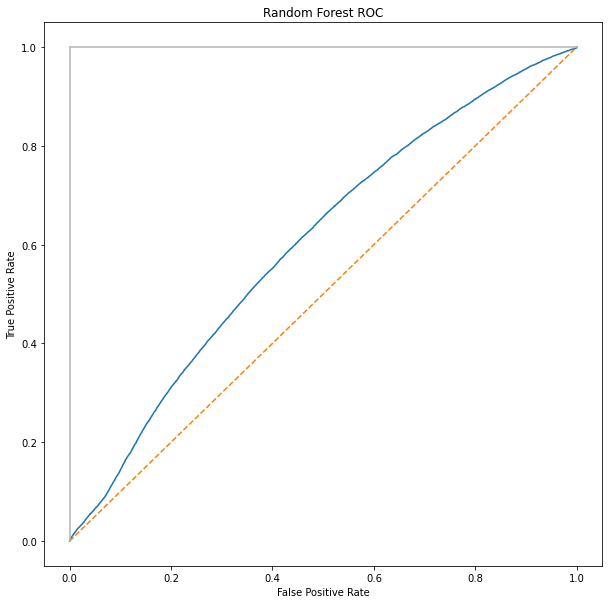

roc_auc_score:  0.6032275019771405


In [17]:
plt.subplots(1, figsize=(10,10))
plt.title('Random Forest ROC')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('roc_auc_score: ', roc_auc_score(y_test, y_score1))